In [47]:
import ipywidgets as widgets
import pandas as pd
import numpy as np
from IPython.display import display

# Python County Vulnerability Dashboard

In [48]:
data = pd.read_csv("data_index.csv")

data.head()

,Unnamed: 0,County,Large_Unt,Crowded_Unt,No_Vehicle,Group_Unt,Pop_Total,Pop_Dens,Median_Inc,Res_Parcel
0,0,Anne Arundel,28410.0,3264.0,8089.0,16092.0,576031,1295.9,96133,1455.00
1,1,Baltimore,62724.0,5144.0,24879.0,20798.0,828431,1345.5,73309,772.25
2,2,Calvert,1447.0,389.0,1309.0,650.0,92003,416.3,100000,221.25
3,3,Carroll,3818.0,396.0,2687.0,3479.0,168429,373.4,92890,330.00
4,4,Cecil,2477.0,583.0,1733.0,1550.0,102826,292.0,72259,164.75


In [49]:
data.drop(data.columns[0], axis = 1)

,County,Large_Unt,Crowded_Unt,No_Vehicle,Group_Unt,Pop_Total,Pop_Dens,Median_Inc,Res_Parcel
0,Anne Arundel,28410.0,3264.0,8089.0,16092.0,576031,1295.9,96133,1455.00
1,Baltimore,62724.0,5144.0,24879.0,20798.0,828431,1345.5,73309,772.25
2,Calvert,1447.0,389.0,1309.0,650.0,92003,416.3,100000,221.25
3,Carroll,3818.0,396.0,2687.0,3479.0,168429,373.4,92890,330.00
4,Cecil,2477.0,583.0,1733.0,1550.0,102826,292.0,72259,164.75
5,Frederick,10028.0,1354.0,4445.0,4624.0,255648,353.5,91727,555.00
6,Harford,10081.0,985.0,4552.0,1951.0,253956,560.1,80922,446.00
7,Queen Anne's,380.0,253.0,535.0,464.0,50251,128.5,90696,181.00
8,Washington,5428.0,1065.0,4594.0,8858.0,150926,322.1,59828,191.50
9,Garrett,619.0,92.0,886.0,596.0,29163,46.5,46899,70.00


In [50]:
county_series = data["County"]

county_list = list(county_series)

In [51]:
buttons = widgets.Select(
    options = county_list,
    value = "Anne Arundel",
    description = "County",
    disabled = False,
    padding = "1000px"
)

display_var = None

# Primary Dashboard Code

In [82]:
tab_nest = widgets.Tab()
accord_list = []
for item in county_list:
    # Large Housing Data
    item_large_housing = data["Large_Unt"].loc[(data["County"] == item)]
    string_large_housing = str(int(item_large_housing.iat[0]))
    
    # Crowded Units Data
    item_crowded_units = data["Crowded_Unt"].loc[(data["County"] == item)]
    string_crowded_units = str(int(item_crowded_units.iat[0]))
    
    # No vehicle Data
    item_no_vehicle = data["No_Vehicle"].loc[(data["County"] == item)]
    string_no_vehicle = str(int(item_no_vehicle.iat[0]))
    
    # No vehicle Data
    item_group_units = data["Group_Unt"].loc[(data["County"] == item)]
    string_group_units = str(int(item_group_units.iat[0]))
    
    # Residential Parcel Data
    item_res_parcel = data["Res_Parcel"].loc[(data["County"] == item)]
    string_res_parcel = str(int(item_res_parcel.iat[0]))
    
    accordion = widgets.Accordion(children=[widgets.HTML(
    value="<h1>" + str(item) + "</h1>"
        + "<h3>" + "The amount of residencies with more than 10 residences in " + str(item) + " county is " + "<b>" + string_large_housing + "</b>" + "</h3>"
        + "<h3>" + "The amount of 'crowded units', or units with more occupants than there are occupancies in " + str(item) + " county is " + "<b>" + string_crowded_units + "</b>" + "</h3>"
        + "<h3>" + "The amount of residences that do not own a vehicle in " + str(item) + " county is " + "<b>" + string_no_vehicle + "</b>" + "</h3>"
        + "<h3>" + "The amount of people in insitutional group housing in " + str(item) + " county is " + "<b>" + string_group_units + "</b>" + "</h3>"
        + "<h3>" + "The Amount of Residential Parcels developed on in 2014 in " + str(item) + " county is " + "<b>" + string_res_parcel + "</b>" + "</h3>",
    )])
    accord_list.append(accordion)
tab_nest.children = accord_list
index = 0
for item in county_list:
    tab_nest.set_title(index, item)
    index += 1
    
display(tab_nest)

In [53]:
data

,Unnamed: 0,County,Large_Unt,Crowded_Unt,No_Vehicle,Group_Unt,Pop_Total,Pop_Dens,Median_Inc,Res_Parcel
0,0,Anne Arundel,28410.0,3264.0,8089.0,16092.0,576031,1295.9,96133,1455.00
1,1,Baltimore,62724.0,5144.0,24879.0,20798.0,828431,1345.5,73309,772.25
2,2,Calvert,1447.0,389.0,1309.0,650.0,92003,416.3,100000,221.25
3,3,Carroll,3818.0,396.0,2687.0,3479.0,168429,373.4,92890,330.00
4,4,Cecil,2477.0,583.0,1733.0,1550.0,102826,292.0,72259,164.75
5,5,Frederick,10028.0,1354.0,4445.0,4624.0,255648,353.5,91727,555.00
6,6,Harford,10081.0,985.0,4552.0,1951.0,253956,560.1,80922,446.00
7,7,Queen Anne's,380.0,253.0,535.0,464.0,50251,128.5,90696,181.00
8,8,Washington,5428.0,1065.0,4594.0,8858.0,150926,322.1,59828,191.50
9,9,Garrett,619.0,92.0,886.0,596.0,29163,46.5,46899,70.00


In [54]:
# data = data.drop(data.columns[0], axis = 1)

In [55]:
data_large_unt_sd = data["Large_Unt"].std()
data_large_unt_mean = data["Large_Unt"].mean()
print(data_large_unt_sd, data_large_unt_mean)

data["Large_Unt_Z"] = data["Large_Unt"].apply(lambda x: (x - data_large_unt_mean) / data_large_unt_sd)

data

36610.30113360628 21963.52


,Unnamed: 0,County,Large_Unt,Crowded_Unt,No_Vehicle,Group_Unt,Pop_Total,Pop_Dens,Median_Inc,Res_Parcel,Large_Unt_Z
0,0,Anne Arundel,28410.0,3264.0,8089.0,16092.0,576031,1295.9,96133,1455.00,0.176084
1,1,Baltimore,62724.0,5144.0,24879.0,20798.0,828431,1345.5,73309,772.25,1.113361
2,2,Calvert,1447.0,389.0,1309.0,650.0,92003,416.3,100000,221.25,-0.560403
3,3,Carroll,3818.0,396.0,2687.0,3479.0,168429,373.4,92890,330.00,-0.495640
4,4,Cecil,2477.0,583.0,1733.0,1550.0,102826,292.0,72259,164.75,-0.532269
5,5,Frederick,10028.0,1354.0,4445.0,4624.0,255648,353.5,91727,555.00,-0.326015
6,6,Harford,10081.0,985.0,4552.0,1951.0,253956,560.1,80922,446.00,-0.324568
7,7,Queen Anne's,380.0,253.0,535.0,464.0,50251,128.5,90696,181.00,-0.589548
8,8,Washington,5428.0,1065.0,4594.0,8858.0,150926,322.1,59828,191.50,-0.451663
9,9,Garrett,619.0,92.0,886.0,596.0,29163,46.5,46899,70.00,-0.583020


In [56]:
data_crowded_unt_sd = data["Crowded_Unt"].std()
data_crowded_unt_mean = data["Crowded_Unt"].mean()
print(data_crowded_unt_sd, data_crowded_unt_mean)

data["Crowded_Unt_Z"] = data["Crowded_Unt"].apply(lambda x: (x - data_crowded_unt_mean) / data_crowded_unt_sd)

data

3558.2316066645612 2257.6


,Unnamed: 0,County,Large_Unt,Crowded_Unt,No_Vehicle,Group_Unt,Pop_Total,Pop_Dens,Median_Inc,Res_Parcel,Large_Unt_Z,Crowded_Unt_Z
0,0,Anne Arundel,28410.0,3264.0,8089.0,16092.0,576031,1295.9,96133,1455.00,0.176084,0.282837
1,1,Baltimore,62724.0,5144.0,24879.0,20798.0,828431,1345.5,73309,772.25,1.113361,0.811189
2,2,Calvert,1447.0,389.0,1309.0,650.0,92003,416.3,100000,221.25,-0.560403,-0.525149
3,3,Carroll,3818.0,396.0,2687.0,3479.0,168429,373.4,92890,330.00,-0.495640,-0.523181
4,4,Cecil,2477.0,583.0,1733.0,1550.0,102826,292.0,72259,164.75,-0.532269,-0.470627
5,5,Frederick,10028.0,1354.0,4445.0,4624.0,255648,353.5,91727,555.00,-0.326015,-0.253946
6,6,Harford,10081.0,985.0,4552.0,1951.0,253956,560.1,80922,446.00,-0.324568,-0.357650
7,7,Queen Anne's,380.0,253.0,535.0,464.0,50251,128.5,90696,181.00,-0.589548,-0.563370
8,8,Washington,5428.0,1065.0,4594.0,8858.0,150926,322.1,59828,191.50,-0.451663,-0.335166
9,9,Garrett,619.0,92.0,886.0,596.0,29163,46.5,46899,70.00,-0.583020,-0.608617


In [57]:
data_no_vehicle_sd = data["No_Vehicle"].std()
data_no_vehicle_mean = data["No_Vehicle"].mean()
print(data_no_vehicle_sd, data_no_vehicle_mean)

data["No_Vehicle_Z"] = data["No_Vehicle"].apply(lambda x: (x - data_no_vehicle_mean) / data_no_vehicle_sd)

data

24106.143197533693 12075.88


,Unnamed: 0,County,Large_Unt,Crowded_Unt,No_Vehicle,Group_Unt,Pop_Total,Pop_Dens,Median_Inc,Res_Parcel,Large_Unt_Z,Crowded_Unt_Z,No_Vehicle_Z
0,0,Anne Arundel,28410.0,3264.0,8089.0,16092.0,576031,1295.9,96133,1455.00,0.176084,0.282837,-0.165389
1,1,Baltimore,62724.0,5144.0,24879.0,20798.0,828431,1345.5,73309,772.25,1.113361,0.811189,0.531114
2,2,Calvert,1447.0,389.0,1309.0,650.0,92003,416.3,100000,221.25,-0.560403,-0.525149,-0.446645
3,3,Carroll,3818.0,396.0,2687.0,3479.0,168429,373.4,92890,330.00,-0.495640,-0.523181,-0.389481
4,4,Cecil,2477.0,583.0,1733.0,1550.0,102826,292.0,72259,164.75,-0.532269,-0.470627,-0.429056
5,5,Frederick,10028.0,1354.0,4445.0,4624.0,255648,353.5,91727,555.00,-0.326015,-0.253946,-0.316553
6,6,Harford,10081.0,985.0,4552.0,1951.0,253956,560.1,80922,446.00,-0.324568,-0.357650,-0.312115
7,7,Queen Anne's,380.0,253.0,535.0,464.0,50251,128.5,90696,181.00,-0.589548,-0.563370,-0.478753
8,8,Washington,5428.0,1065.0,4594.0,8858.0,150926,322.1,59828,191.50,-0.451663,-0.335166,-0.310372
9,9,Garrett,619.0,92.0,886.0,596.0,29163,46.5,46899,70.00,-0.583020,-0.608617,-0.464192


In [58]:
data_group_unt_sd = data["Group_Unt"].std()
data_group_unt_mean = data["Group_Unt"].mean()
print(data_group_unt_sd, data_group_unt_mean)

data["Group_Unt_Z"] = data["Group_Unt"].apply(lambda x: (x - data_group_unt_mean) / data_group_unt_sd)

data

9725.664454250242 7211.92


,Unnamed: 0,County,Large_Unt,Crowded_Unt,No_Vehicle,Group_Unt,Pop_Total,Pop_Dens,Median_Inc,Res_Parcel,Large_Unt_Z,Crowded_Unt_Z,No_Vehicle_Z,Group_Unt_Z
0,0,Anne Arundel,28410.0,3264.0,8089.0,16092.0,576031,1295.9,96133,1455.00,0.176084,0.282837,-0.165389,0.913056
1,1,Baltimore,62724.0,5144.0,24879.0,20798.0,828431,1345.5,73309,772.25,1.113361,0.811189,0.531114,1.396931
2,2,Calvert,1447.0,389.0,1309.0,650.0,92003,416.3,100000,221.25,-0.560403,-0.525149,-0.446645,-0.674701
3,3,Carroll,3818.0,396.0,2687.0,3479.0,168429,373.4,92890,330.00,-0.495640,-0.523181,-0.389481,-0.383822
4,4,Cecil,2477.0,583.0,1733.0,1550.0,102826,292.0,72259,164.75,-0.532269,-0.470627,-0.429056,-0.582163
5,5,Frederick,10028.0,1354.0,4445.0,4624.0,255648,353.5,91727,555.00,-0.326015,-0.253946,-0.316553,-0.266092
6,6,Harford,10081.0,985.0,4552.0,1951.0,253956,560.1,80922,446.00,-0.324568,-0.357650,-0.312115,-0.540932
7,7,Queen Anne's,380.0,253.0,535.0,464.0,50251,128.5,90696,181.00,-0.589548,-0.563370,-0.478753,-0.693826
8,8,Washington,5428.0,1065.0,4594.0,8858.0,150926,322.1,59828,191.50,-0.451663,-0.335166,-0.310372,0.169251
9,9,Garrett,619.0,92.0,886.0,596.0,29163,46.5,46899,70.00,-0.583020,-0.608617,-0.464192,-0.680254


In [59]:
data_pop_total_sd = data["Pop_Total"].std()
data_pop_total_mean = data["Pop_Total"].mean()
print(data_pop_total_sd, data_pop_total_mean)

data["Pop_Total_Z"] = data["Pop_Total"].apply(lambda x: (x - data_pop_total_mean) / data_pop_total_sd)

data

313510.8336466913 269806.52


,Unnamed: 0,County,Large_Unt,Crowded_Unt,No_Vehicle,Group_Unt,Pop_Total,Pop_Dens,Median_Inc,Res_Parcel,Large_Unt_Z,Crowded_Unt_Z,No_Vehicle_Z,Group_Unt_Z,Pop_Total_Z
0,0,Anne Arundel,28410.0,3264.0,8089.0,16092.0,576031,1295.9,96133,1455.00,0.176084,0.282837,-0.165389,0.913056,0.976759
1,1,Baltimore,62724.0,5144.0,24879.0,20798.0,828431,1345.5,73309,772.25,1.113361,0.811189,0.531114,1.396931,1.781835
2,2,Calvert,1447.0,389.0,1309.0,650.0,92003,416.3,100000,221.25,-0.560403,-0.525149,-0.446645,-0.674701,-0.567137
3,3,Carroll,3818.0,396.0,2687.0,3479.0,168429,373.4,92890,330.00,-0.495640,-0.523181,-0.389481,-0.383822,-0.323362
4,4,Cecil,2477.0,583.0,1733.0,1550.0,102826,292.0,72259,164.75,-0.532269,-0.470627,-0.429056,-0.582163,-0.532615
5,5,Frederick,10028.0,1354.0,4445.0,4624.0,255648,353.5,91727,555.00,-0.326015,-0.253946,-0.316553,-0.266092,-0.045161
6,6,Harford,10081.0,985.0,4552.0,1951.0,253956,560.1,80922,446.00,-0.324568,-0.357650,-0.312115,-0.540932,-0.050558
7,7,Queen Anne's,380.0,253.0,535.0,464.0,50251,128.5,90696,181.00,-0.589548,-0.563370,-0.478753,-0.693826,-0.700312
8,8,Washington,5428.0,1065.0,4594.0,8858.0,150926,322.1,59828,191.50,-0.451663,-0.335166,-0.310372,0.169251,-0.379191
9,9,Garrett,619.0,92.0,886.0,596.0,29163,46.5,46899,70.00,-0.583020,-0.608617,-0.464192,-0.680254,-0.767576


In [60]:
#data = data.drop(data.columns[0], axis = 1)

In [61]:
data_res_parcel_sd = data["Res_Parcel"].std()
data_res_parcel_mean = data["Res_Parcel"].mean()
print(data_res_parcel_sd, data_res_parcel_mean)

data["Res_Parcel_Z"] = data["Res_Parcel"].apply(lambda x: (x - data_res_parcel_mean) / data_res_parcel_sd)


452.2283238310047 390.83


In [62]:

"""We decided to exclude Median Income and Population Density"""

data


,Unnamed: 0,County,Large_Unt,Crowded_Unt,No_Vehicle,Group_Unt,Pop_Total,Pop_Dens,Median_Inc,Res_Parcel,Large_Unt_Z,Crowded_Unt_Z,No_Vehicle_Z,Group_Unt_Z,Pop_Total_Z,Res_Parcel_Z
0,0,Anne Arundel,28410.0,3264.0,8089.0,16092.0,576031,1295.9,96133,1455.00,0.176084,0.282837,-0.165389,0.913056,0.976759,2.353170
1,1,Baltimore,62724.0,5144.0,24879.0,20798.0,828431,1345.5,73309,772.25,1.113361,0.811189,0.531114,1.396931,1.781835,0.843424
2,2,Calvert,1447.0,389.0,1309.0,650.0,92003,416.3,100000,221.25,-0.560403,-0.525149,-0.446645,-0.674701,-0.567137,-0.374988
3,3,Carroll,3818.0,396.0,2687.0,3479.0,168429,373.4,92890,330.00,-0.495640,-0.523181,-0.389481,-0.383822,-0.323362,-0.134512
4,4,Cecil,2477.0,583.0,1733.0,1550.0,102826,292.0,72259,164.75,-0.532269,-0.470627,-0.429056,-0.582163,-0.532615,-0.499924
5,5,Frederick,10028.0,1354.0,4445.0,4624.0,255648,353.5,91727,555.00,-0.326015,-0.253946,-0.316553,-0.266092,-0.045161,0.363025
6,6,Harford,10081.0,985.0,4552.0,1951.0,253956,560.1,80922,446.00,-0.324568,-0.357650,-0.312115,-0.540932,-0.050558,0.121996
7,7,Queen Anne's,380.0,253.0,535.0,464.0,50251,128.5,90696,181.00,-0.589548,-0.563370,-0.478753,-0.693826,-0.700312,-0.463991
8,8,Washington,5428.0,1065.0,4594.0,8858.0,150926,322.1,59828,191.50,-0.451663,-0.335166,-0.310372,0.169251,-0.379191,-0.440773
9,9,Garrett,619.0,92.0,886.0,596.0,29163,46.5,46899,70.00,-0.583020,-0.608617,-0.464192,-0.680254,-0.767576,-0.709443


In [63]:
data

,Unnamed: 0,County,Large_Unt,Crowded_Unt,No_Vehicle,Group_Unt,Pop_Total,Pop_Dens,Median_Inc,Res_Parcel,Large_Unt_Z,Crowded_Unt_Z,No_Vehicle_Z,Group_Unt_Z,Pop_Total_Z,Res_Parcel_Z
0,0,Anne Arundel,28410.0,3264.0,8089.0,16092.0,576031,1295.9,96133,1455.00,0.176084,0.282837,-0.165389,0.913056,0.976759,2.353170
1,1,Baltimore,62724.0,5144.0,24879.0,20798.0,828431,1345.5,73309,772.25,1.113361,0.811189,0.531114,1.396931,1.781835,0.843424
2,2,Calvert,1447.0,389.0,1309.0,650.0,92003,416.3,100000,221.25,-0.560403,-0.525149,-0.446645,-0.674701,-0.567137,-0.374988
3,3,Carroll,3818.0,396.0,2687.0,3479.0,168429,373.4,92890,330.00,-0.495640,-0.523181,-0.389481,-0.383822,-0.323362,-0.134512
4,4,Cecil,2477.0,583.0,1733.0,1550.0,102826,292.0,72259,164.75,-0.532269,-0.470627,-0.429056,-0.582163,-0.532615,-0.499924
5,5,Frederick,10028.0,1354.0,4445.0,4624.0,255648,353.5,91727,555.00,-0.326015,-0.253946,-0.316553,-0.266092,-0.045161,0.363025
6,6,Harford,10081.0,985.0,4552.0,1951.0,253956,560.1,80922,446.00,-0.324568,-0.357650,-0.312115,-0.540932,-0.050558,0.121996
7,7,Queen Anne's,380.0,253.0,535.0,464.0,50251,128.5,90696,181.00,-0.589548,-0.563370,-0.478753,-0.693826,-0.700312,-0.463991
8,8,Washington,5428.0,1065.0,4594.0,8858.0,150926,322.1,59828,191.50,-0.451663,-0.335166,-0.310372,0.169251,-0.379191,-0.440773
9,9,Garrett,619.0,92.0,886.0,596.0,29163,46.5,46899,70.00,-0.583020,-0.608617,-0.464192,-0.680254,-0.767576,-0.709443


In [67]:
data

,Unnamed: 0,County,Large_Unt,Crowded_Unt,No_Vehicle,Group_Unt,Pop_Total,Pop_Dens,Median_Inc,Res_Parcel,Large_Unt_Z,Crowded_Unt_Z,No_Vehicle_Z,Group_Unt_Z,Pop_Total_Z,Res_Parcel_Z
0,0,Anne Arundel,28410.0,3264.0,8089.0,16092.0,576031,1295.9,96133,1455.00,0.176084,0.282837,-0.165389,0.913056,0.976759,2.353170
1,1,Baltimore,62724.0,5144.0,24879.0,20798.0,828431,1345.5,73309,772.25,1.113361,0.811189,0.531114,1.396931,1.781835,0.843424
2,2,Calvert,1447.0,389.0,1309.0,650.0,92003,416.3,100000,221.25,-0.560403,-0.525149,-0.446645,-0.674701,-0.567137,-0.374988
3,3,Carroll,3818.0,396.0,2687.0,3479.0,168429,373.4,92890,330.00,-0.495640,-0.523181,-0.389481,-0.383822,-0.323362,-0.134512
4,4,Cecil,2477.0,583.0,1733.0,1550.0,102826,292.0,72259,164.75,-0.532269,-0.470627,-0.429056,-0.582163,-0.532615,-0.499924
5,5,Frederick,10028.0,1354.0,4445.0,4624.0,255648,353.5,91727,555.00,-0.326015,-0.253946,-0.316553,-0.266092,-0.045161,0.363025
6,6,Harford,10081.0,985.0,4552.0,1951.0,253956,560.1,80922,446.00,-0.324568,-0.357650,-0.312115,-0.540932,-0.050558,0.121996
7,7,Queen Anne's,380.0,253.0,535.0,464.0,50251,128.5,90696,181.00,-0.589548,-0.563370,-0.478753,-0.693826,-0.700312,-0.463991
8,8,Washington,5428.0,1065.0,4594.0,8858.0,150926,322.1,59828,191.50,-0.451663,-0.335166,-0.310372,0.169251,-0.379191,-0.440773
9,9,Garrett,619.0,92.0,886.0,596.0,29163,46.5,46899,70.00,-0.583020,-0.608617,-0.464192,-0.680254,-0.767576,-0.709443


SyntaxError: invalid syntax (<ipython-input-66-230d459a7c41>, line 1)

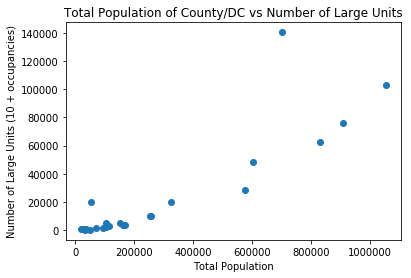

           Pop_Total  Large_Unt
Pop_Total   1.000000   0.876332
Large_Unt   0.876332   1.000000


In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(data["Pop_Total"], data["Large_Unt"])
plt.xlabel('Total Population')
plt.ylabel('Number of Large Units (10 + occupancies)')
plt.title("Total Population of County/DC vs Number of Large Units")
plt.show()

pop_total = data[["Pop_Total","Large_Unt"]]

print(pop_total.corr()) #.876332

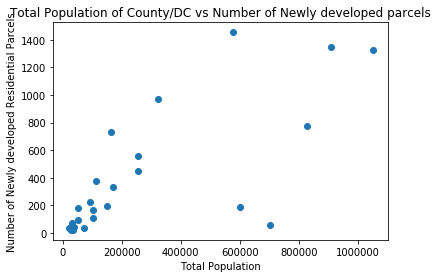

In [75]:
plt.scatter(data["Pop_Total"], data["Res_Parcel"])
plt.xlabel('Total Population')
plt.ylabel('Number of Newly developed Residential Parcels')
plt.title("Total Population of County/DC vs Number of Newly developed parcels")
plt.show()

pop_total = data[["Pop_Total","Large_Unt"]]


print(pop_total.corr()) #.876332

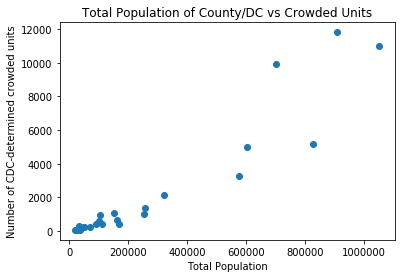

In [77]:
plt.scatter(data["Pop_Total"], data["Crowded_Unt"])
plt.xlabel('Total Population')
plt.ylabel('Number of CDC-determined crowded units')
plt.title("Total Population of County/DC vs Crowded Units")
plt.show()